# Spark DataFrame - CRISP-DM

Let's start off with the fundamentals of Spark DataFrame. 

Objective: In this exercise, you'll find out how to start a spark session, read in data, explore the data and manipuluate the data (using DataFrame syntax as well as SQL syntax). Let's get started! 

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/08 01:27:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Import necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [3]:
# Load CSV files
file_names = [
    "Datasets/2022 Policy Strength.csv",
    "Datasets/2022 Ocean Science Funding.csv",
    "Datasets/2022 Marine Key Biodiversities Areas Percentage.csv",
    "Datasets/2018 Sustainable Fish Stock.csv",
    "Datasets/1969 - 2018 capture-fisheries-vs-aquaculture.csv"
]

In [4]:
dfs = []
for file_name in file_names:
    df = spark.read.csv(file_name, header=True, inferSchema=True)
    dfs.append(df)

In [5]:
# Explore Data
for df in dfs:
    df.show(10)

+-------------------+-----+
|        GeoAreaName|Value|
+-------------------+-----+
|        Afghanistan|  2.0|
|            Albania|  5.0|
|             Angola|  2.0|
|Antigua and Barbuda|  3.0|
|          Argentina|  2.0|
|          Australia|  5.0|
|            Austria|  5.0|
|         Azerbaijan|  2.0|
|            Bahamas|  2.0|
|         Bangladesh|  3.0|
+-------------------+-----+
only showing top 10 rows

+-----------+-------+
|GeoAreaName|    GDP|
+-----------+-------+
|    Albania|   4.09|
|     Angola|  0.121|
|  Australia|  4.089|
|    Belgium|  0.121|
|     Brazil|0.03733|
|   Bulgaria|0.05712|
|     Canada|0.66731|
|      Chile|  0.019|
|   Colombia|  0.046|
|    Croatia|2.92615|
+-----------+-------+
only showing top 10 rows

+-------------------+-----------+
|        GeoAreaName|MPA Percent|
+-------------------+-----------+
|        Afghanistan|        NaN|
|            Albania|   67.28002|
|            Algeria|   74.49829|
|     American Samoa|   69.17841|
|         

In [6]:
# Data visualization for each table
# 1. 2022 Policy Strength
df_0 = dfs[0]
df_0 = df_0.withColumn("Value", df_0["Value"].cast(IntegerType()))
df_0 = df_0.na.drop()
df_0_pd = df_0.toPandas()

<Figure size 720x432 with 0 Axes>

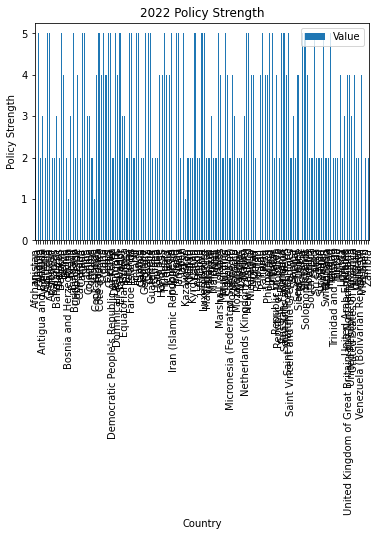

In [7]:
# Plotting with Pandas (alternative to Matplotlib for this step)
plt.figure(figsize=(10, 6))
df_0_pd.plot(kind="bar", x="GeoAreaName", y="Value", rot=90)
plt.xlabel("Country")
plt.ylabel("Policy Strength")
plt.title("2022 Policy Strength")
plt.show()

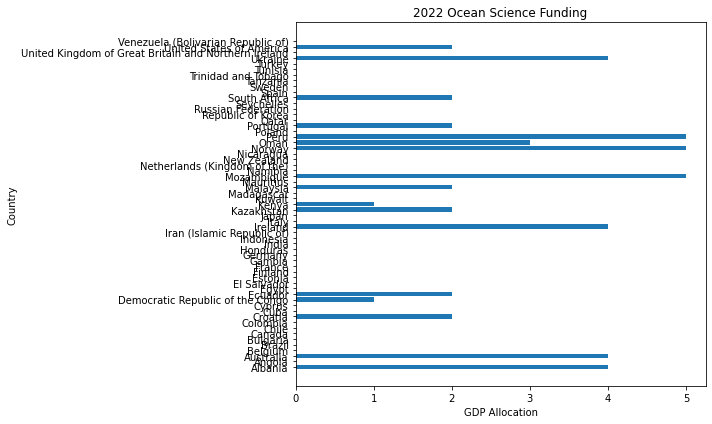

In [8]:
# 2. 2022 Ocean Science Funding
df_1 = dfs[1]
df_1 = df_1.withColumn("GDP", df_1["GDP"].cast(IntegerType()))
df_1 = df_1.na.drop()

# Convert to Pandas DataFrame for plotting
df_1_pd = df_1.toPandas()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_1_pd["GeoAreaName"], df_1_pd["GDP"])
plt.xlabel("GDP Allocation")
plt.ylabel("Country")
plt.title("2022 Ocean Science Funding")
plt.tight_layout()
plt.show()

In [9]:
# 3. 2022 Marine Key Biodiversities Areas Percentage (scatter plot)
df_2 = dfs[2]
df_2 = df_2.withColumn("Percent", df_2["MPA Percent"].cast(IntegerType()))
df_2 = df_2.na.drop()
df_2_pd = df_2.toPandas()

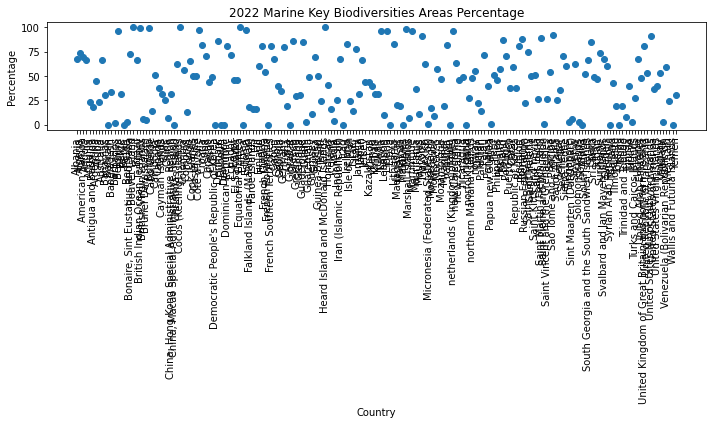

In [10]:
# Plotting with Pandas
plt.figure(figsize=(10, 6))
plt.scatter(df_2_pd["GeoAreaName"], df_2_pd["Percent"])
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("2022 Marine Key Biodiversities Areas Percentage")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# 4. 2018 Sustainable Fish Stock
df_3 = dfs[3]
df_3 = df_3.withColumn("Percentage", df_3["Percentage"].cast(IntegerType()))
df_3 = df_3.na.drop()
df_3_pd = df_3.toPandas()

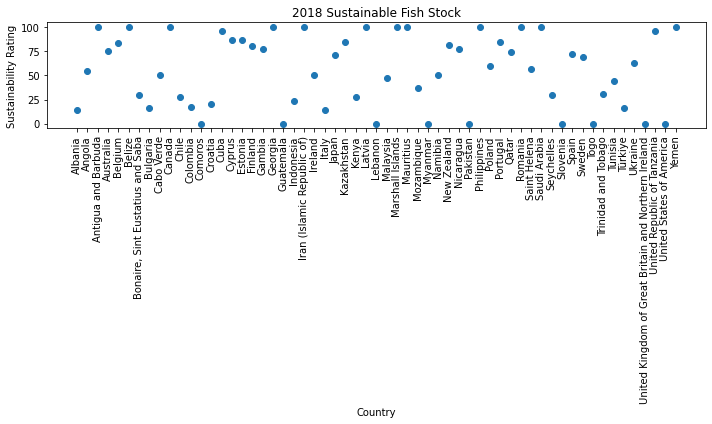

In [12]:
# Plotting with Pandas
plt.figure(figsize=(10, 6))
plt.scatter(df_3_pd["GeoAreaName"], df_3_pd["Percentage"])
plt.xlabel("Country")
plt.ylabel("Sustainability Rating")
plt.title("2018 Sustainable Fish Stock")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# 5. 1969-2018 Capture Fisheries vs Aquaculture
df_4 = dfs[4]
df_4 = df_4.na.drop()
df_4 = df_4.withColumn("Year", df_4["Year"].cast(IntegerType()))
df_4 = df_4.withColumn("Capture", df_4["Capture"].cast(IntegerType()))
df_4 = df_4.withColumn("Aquaculture", df_4["Aquaculture"].cast(IntegerType()))
df_4 = df_4.na.drop()
df_4_pd = df_4.toPandas()

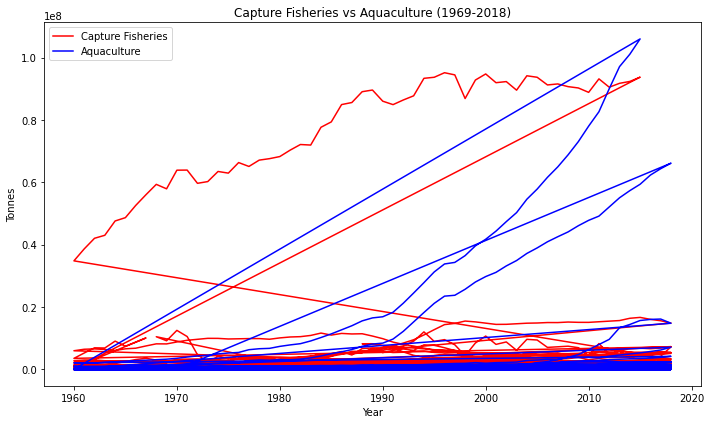

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df_4_pd["Year"], df_4_pd["Capture"], color="red", label="Capture Fisheries")
plt.plot(df_4_pd["Year"], df_4_pd["Aquaculture"], color="blue", label="Aquaculture")
plt.xlabel("Year")
plt.ylabel("Tonnes")
plt.legend()
plt.title("Capture Fisheries vs Aquaculture (1969-2018)")
plt.tight_layout()
plt.show()

In [15]:
# Quality report for each dataframe
for i, df in enumerate(dfs):
    print(f"Table {i + 1}:")
    df.printSchema()
    df.describe().show()

# Data Preparation
# In this section, you can add data preprocessing and transformation steps as needed.
# For example, renaming columns, merging dataframes, handling missing values, and feature engineering.

# Model Building
# You can add machine learning model building and evaluation steps in this section.
# For example, building a classification or regression model to address the overfishing problem.

# Action Plan and Implementation
# Outline your plan for implementing the solution, monitoring, and continuous improvement.

# 07-DM
# Execute DM task (if applicable)

# 08-INT
# Summarize Results

# Add relevant tables or graphs

# 09-ACT
# Describe the Action Plan for Implementation, Observation, and Improvement

Table 1:
root
 |-- GeoAreaName: string (nullable = true)
 |-- Value: double (nullable = true)

+-------+-----------+-----+
|summary|GeoAreaName|Value|
+-------+-----------+-----+
|  count|        143|  143|
|   mean|       null|  NaN|
| stddev|       null|  NaN|
|    min|Afghanistan|  1.0|
|    max|     Zambia|  NaN|
+-------+-----------+-----+

Table 2:
root
 |-- GeoAreaName: string (nullable = true)
 |-- GDP: double (nullable = true)

+-------+--------------------+------------------+
|summary|         GeoAreaName|               GDP|
+-------+--------------------+------------------+
|  count|                  59|                59|
|   mean|                null|1.1925756610169493|
| stddev|                null|1.6928680878942637|
|    min|             Albania|             0.017|
|    max|Venezuela (Boliva...|           5.81459|
+-------+--------------------+------------------+

Table 3:
root
 |-- GeoAreaName: string (nullable = true)
 |-- MPA Percent: double (nullable = true)

+------

+-------+-----------+-----+------------------+-----------------+------------------+--------------------+-------------+
|summary|     Entity| Code|              Year|      Aquaculture|           Capture|     Total Fisheries|Aquaculture %|
+-------+-----------+-----+------------------+-----------------+------------------+--------------------+-------------+
|  count|      12727|11842|             12727|            12727|             12569|               12727|        12727|
|   mean|       null| null|1989.8502396479926|850645.6345012174|1808730.2818874205|   2636921.340719728|          NaN|
| stddev|       null| null|16.995970153976554|6345830.966888931| 7909133.176277117|1.3275191413369168E7|          NaN|
|    min|Afghanistan|  ABW|              1960|              0.0|               0.0|                 0.0|          0.0|
|    max|   Zimbabwe|  ZWE|              2018|     1.06004184E8|        9.515958E7|        1.99741124E8|          NaN|
+-------+-----------+-----+------------------+--

In [16]:
from pyspark.sql.functions import when

# 03-DP

# Print the current dataframe
dfs[3].select("GeoAreaName", "Percentage").show(5)

+-------------------+----------+
|        GeoAreaName|Percentage|
+-------------------+----------+
|            Albania|     14.29|
|             Angola|     55.56|
|Antigua and Barbuda|     100.0|
|          Australia|      75.4|
|            Belgium|     84.62|
+-------------------+----------+
only showing top 5 rows



In [17]:
# Add SDG14_4_1 column
dfs[3] = dfs[3].withColumn("SDG14_4_1", when(dfs[3]["Percentage"] > 50, 1).otherwise(0))

# Print the updated dataframe
dfs[3].select("GeoAreaName", "Percentage", "SDG14_4_1").show(5)

+-------------------+----------+---------+
|        GeoAreaName|Percentage|SDG14_4_1|
+-------------------+----------+---------+
|            Albania|     14.29|        0|
|             Angola|     55.56|        1|
|Antigua and Barbuda|     100.0|        1|
|          Australia|      75.4|        1|
|            Belgium|     84.62|        1|
+-------------------+----------+---------+
only showing top 5 rows



In [18]:
# Data Cleaning
# Rename "Entity" column to "GeoAreaName" in table 5
dfs[4] = dfs[4].withColumnRenamed("Entity", "GeoAreaName")

# Merge the tables based on the "GeoAreaName" column
merged_df = dfs[0]
for i in range(1, len(dfs)):
    merged_df = merged_df.join(dfs[i], on=["GeoAreaName"], how="outer")

# Display the merged table
merged_df.show(5)

+-----------+-----+----+-----------+----------+---------+----+----+-----------+-------+---------------+-------------+
|GeoAreaName|Value| GDP|MPA Percent|Percentage|SDG14_4_1|Code|Year|Aquaculture|Capture|Total Fisheries|Aquaculture %|
+-----------+-----+----+-----------+----------+---------+----+----+-----------+-------+---------------+-------------+
|Afghanistan|  2.0|null|        NaN|      null|     null| AFG|1969|       60.0|  400.0|          460.0|  13.04347826|
|Afghanistan|  2.0|null|        NaN|      null|     null| AFG|1970|       60.0|  400.0|          460.0|  13.04347826|
|Afghanistan|  2.0|null|        NaN|      null|     null| AFG|1971|       60.0|  500.0|          560.0|  10.71428571|
|Afghanistan|  2.0|null|        NaN|      null|     null| AFG|1972|       60.0|  500.0|          560.0|  10.71428571|
|Afghanistan|  2.0|null|        NaN|      null|     null| AFG|1973|       60.0|  500.0|          560.0|  10.71428571|
+-----------+-----+----+-----------+----------+---------

In [19]:
# Drop rows with missing values
merged_df = merged_df.dropna()

# Count the number of rows
num_rows_left = merged_df.count()

# Display the dataframe without missing values and the count
print("Number of rows left:", num_rows_left)

Number of rows left: 1781


In [20]:
# 04-DT: Data Transformation

# Remove the "Code" column from the merged_df dataframe
merged_df = merged_df.drop("Code")

# Transform the "SDG14_4_1" column values to 1 if true, otherwise 0
from pyspark.sql.functions import expr
merged_df = merged_df.withColumn("SDG14_4_1", when(expr("SDG14_4_1 = true"), 1).otherwise(0))

# Display the modified merged table (first 5 rows)
merged_df.show(5)

+-----------+-----+----+-----------+----------+---------+----+-----------+-------+---------------+-------------+
|GeoAreaName|Value| GDP|MPA Percent|Percentage|SDG14_4_1|Year|Aquaculture|Capture|Total Fisheries|Aquaculture %|
+-----------+-----+----+-----------+----------+---------+----+-----------+-------+---------------+-------------+
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1960|        0.0|  200.0|          200.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1961|        0.0|  300.0|          300.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1962|        0.0|  300.0|          300.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1963|        0.0|  300.0|          300.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1964|        0.0|  300.0|          300.0|          0.0|
+-----------+-----+----+-----------+----------+---------+----+-----------+-------+--------------

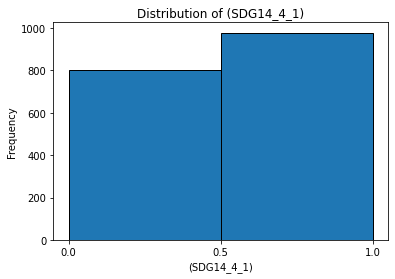

In [21]:
# Filter out rows with None values in the "log_SDG14_4_1" column
filtered_df = merged_df.filter(merged_df["SDG14_4_1"].isNotNull())

# Plot a histogram of the log values
import matplotlib.pyplot as plt
log_values = filtered_df.select("SDG14_4_1").rdd.flatMap(lambda x: x).collect()
plt.hist(log_values, bins=[0, 0.5, 1], edgecolor='black')
plt.xlabel("(SDG14_4_1)")
plt.ylabel("Frequency")
plt.title("Distribution of (SDG14_4_1)")
plt.xticks([0,0.5, 1])
plt.show()

In [22]:
# Calculate counts of 0s and 1s in the "SDG14_4_1" column
counts = merged_df.groupBy("SDG14_4_1").count()
counts.show()

+---------+-----+
|SDG14_4_1|count|
+---------+-----+
|        1|  978|
|        0|  803|
+---------+-----+



In [23]:
# Print the modified merged table (first 5 rows)
merged_df.show(5)

+-----------+-----+----+-----------+----------+---------+----+-----------+-------+---------------+-------------+
|GeoAreaName|Value| GDP|MPA Percent|Percentage|SDG14_4_1|Year|Aquaculture|Capture|Total Fisheries|Aquaculture %|
+-----------+-----+----+-----------+----------+---------+----+-----------+-------+---------------+-------------+
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1960|        0.0|  200.0|          200.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1961|        0.0|  300.0|          300.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1962|        0.0|  300.0|          300.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1963|        0.0|  300.0|          300.0|          0.0|
|    Albania|  5.0|4.09|   67.28002|     14.29|        0|1964|        0.0|  300.0|          300.0|          0.0|
+-----------+-----+----+-----------+----------+---------+----+-----------+-------+--------------

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Convert boolean target "SDG14.4.1" to integers
merged_df = merged_df.withColumn("SDG14_4_1", merged_df["SDG14_4_1"].cast("integer"))

# Define features and target variable
feature_cols = ["GDP", "MPA Percent", "Aquaculture", "Value"]
target_col = "SDG14_4_1"

# Standardize the features using StandardScaler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
merged_df = assembler.transform(merged_df)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(merged_df)
merged_df = scaler_model.transform(merged_df)

# Split the data into training and testing sets
train_data, test_data = merged_df.randomSplit([0.8, 0.2], seed=42)

# Build a linear regression model
lr = LinearRegression(featuresCol="scaledFeatures", labelCol=target_col)

# Train the model
lr_model = lr.fit(train_data)

# Evaluate the model's performance
predictions = lr_model.transform(test_data)
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Get feature importances
feature_importances = lr_model.coefficients

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_cols, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.show()

# Print the model summary
print("Model Summary:")
print("Features:", feature_cols)
print("Intercept:", lr_model.intercept)
print("Coefficients:", lr_model.coefficients)
print("Mean Absolute Error (MAE):", mae)
print("Accuracy (R-squared):", accuracy)



IllegalArgumentException: Output column features already exists.

Now that we're done with this tutorial, let's move on to Spark DataFrame Operations!